In [22]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt


df=pd.read_csv("./data_formatted/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

df = df.dropna()
df = df[(df.player1_plays > 10) & (df.player2_plays>10)]
df.shape

(35572, 36)

In [23]:
from sklearn.model_selection import train_test_split

X = df[["player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating", "player1_mean_atp_adversary", "player1_height", "player1_weight", "player1_oddsB365",
        "player2_name", "player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating", "player2_mean_atp_adversary", "player2_height", "player2_weight", "player2_oddsB365",
        "match_date"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)# shuffle=False)


In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

col_to_drop = ["player1_name", "player2_name", "match_date"]
X_train_filtered = X_train.drop(col_to_drop,axis=1)
X_test_filtered = X_test.drop(col_to_drop,axis=1)

scaler = MinMaxScaler()
scaler.fit(X_train_filtered[["player1_elo","player2_elo"]])
X_train_filtered[["player1_elo","player2_elo"]] = scaler.transform(X_train_filtered[["player1_elo","player2_elo"]])
X_test_filtered[["player1_elo","player2_elo"]] = scaler.transform(X_test_filtered[["player1_elo","player2_elo"]])

#scaler = StandardScaler()
#scaler.fit(X_train_filtered)
#X_train_filtered = scaler.transform(X_train_filtered)
#X_test_filtered = scaler.transform(X_test_filtered)

X_train_filtered = pd.DataFrame(X_train_filtered)
X_test_filtered = pd.DataFrame(X_test_filtered)

X_train_filtered.head()

,player1_age,player1_atprank,player1_plays,player1_wins,player1_losses,player1_elo,player1_mean_serve_rating,player1_mean_atp_adversary,player1_height,player1_weight,...,player2_atprank,player2_plays,player2_wins,player2_losses,player2_elo,player2_mean_serve_rating,player2_mean_atp_adversary,player2_height,player2_weight,player2_oddsB365
39723,23.575633,22.0,127,71,56,0.308011,258.560963,62.169769,185.0,84.0,...,86.0,58,23,35,0.167189,277.852632,79.705590,191.0,87.0,3.25
14036,34.184805,59.0,213,107,106,0.175721,248.840068,60.869732,178.0,74.0,...,22.0,238,124,114,0.238708,253.224824,66.041596,183.0,73.0,1.57
33806,33.722108,2.0,922,791,131,0.657305,278.417755,38.423510,185.0,85.0,...,71.0,587,311,276,0.184598,260.241466,79.946392,185.0,78.0,10.00
14371,30.573580,32.0,313,209,104,0.304328,264.708750,68.719751,191.0,88.0,...,56.0,217,110,107,0.216907,248.809312,60.499108,178.0,74.0,2.62
14472,21.579740,14.0,148,80,68,0.209484,264.836977,64.498897,196.0,91.0,...,32.0,107,52,55,0.254078,270.109890,82.774650,183.0,86.0,1.66


Epoch 1/100


285/285 [==============================] - 1s 1ms/step - loss: 2.2456 - accuracy: 0.5759 - val_loss: 0.7162 - val_accuracy: 0.5732
Epoch 2/100
285/285 [==============================] - 0s 819us/step - loss: 0.5278 - accuracy: 0.5736 - val_loss: 0.5809 - val_accuracy: 0.5469
Epoch 3/100
285/285 [==============================] - 0s 792us/step - loss: 0.3047 - accuracy: 0.5857 - val_loss: 0.2234 - val_accuracy: 0.6089
Epoch 4/100
285/285 [==============================] - 0s 803us/step - loss: 0.2349 - accuracy: 0.5935 - val_loss: 0.1869 - val_accuracy: 0.6252
Epoch 5/100
285/285 [==============================] - 0s 792us/step - loss: 0.2090 - accuracy: 0.5999 - val_loss: 0.1831 - val_accuracy: 0.6145
Epoch 6/100
285/285 [==============================] - 0s 794us/step - loss: 0.1848 - accuracy: 0.6111 - val_loss: 0.1808 - val_accuracy: 0.5871
Epoch 7/100
285/285 [==============================] - 0s 803us/step - loss: 0.1828 - accuracy: 0.6090 - val_loss: 0.1738 - val_accuracy: 0.6413

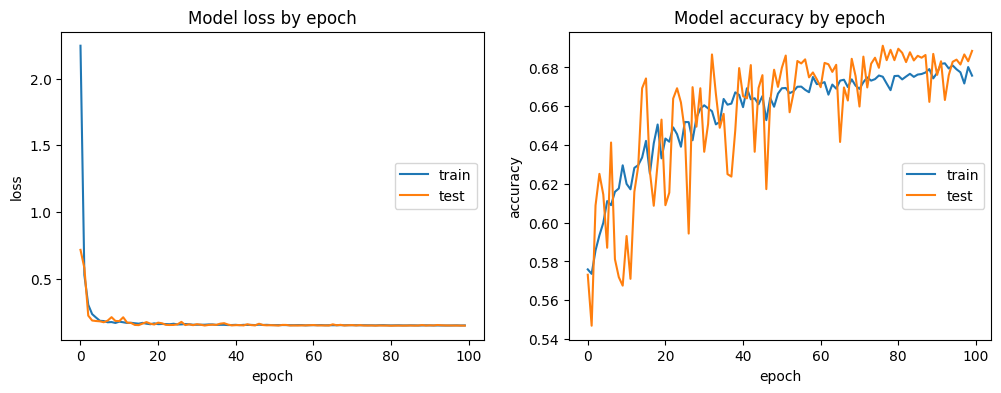

In [25]:
import keras
from keras.layers import Dense
import matplotlib.pyplot as plt

model = keras.Sequential()
model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_focal_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_filtered, y_train,                        # Training dataset
                        epochs = 100,                         # Number of epochs
                        batch_size = 100,                     # Len of batch
                        validation_data=(X_test_filtered, y_test))    # Validation dataset

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test_filtered)

print('Accuracy :', accuracy_score(y_predict.round(), y_test))

223/223 [==============================] - 0s 439us/step
Accuracy : 0.6885453267744203


In [27]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

df_roi["proba_bookmaker"] = (1/df_roi.player1_oddsB365).round()
df_roi[["player1_name","player1_oddsB365","player2_name","player2_oddsB365", "y_test", "proba_bookmaker", "y_predict", "y_predict_proba",]]


,player1_name,player1_oddsB365,player2_name,player2_oddsB365,y_test,proba_bookmaker,y_predict,y_predict_proba
18040,Kei Nishikori,2.25,Juan Monaco,1.57,1,0.0,0.0,0.473410
38319,David Goffin,1.20,Albert Ramos-Vinolas,4.50,1,1.0,1.0,0.606441
18243,Jeremy Chardy,1.53,Potito Starace,2.37,1,1.0,1.0,0.529887
26696,Dudi Sela,8.00,Gilles Simon,1.08,0,0.0,0.0,0.298892
26064,Lleyton Hewitt,3.75,Andy Roddick,1.25,1,0.0,0.0,0.410851
...,...,...,...,...,...,...,...,...
45683,Daniel Evans,1.66,Karen Khachanov,2.10,1,1.0,0.0,0.467346
40777,Steve Johnson,1.72,Adrian Mannarino,2.00,1,1.0,0.0,0.498366
12603,Fabrice Santoro,3.50,Tomas Berdych,1.28,0,0.0,0.0,0.368603
28990,Marin Cilic,1.28,Pablo Andujar,3.50,0,1.0,1.0,0.603894


In [28]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

df_roi= df_roi.loc[df_roi["y_predict_proba"]>0.90]

money_invested=df_roi.shape[0]

money_won = 0.0
for index, row in df_roi.iterrows():
    if row.y_predict == row.y_test :
        if row.y_predict == 0 :
            money_won += row.player2_oddsB365
        else:
            money_won += row.player1_oddsB365

print("money spent:", money_invested,"€")
print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")

money spent: 8 €
money won: 7.04 €
TOTAL: -0.96 €
ROI: 88.0 %
